## 导入文件
- sheet_name=1（实际sheet2）

In [1]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=1)

# 取第2-25行数据（即All Alpha proteins数据），同理取其他的
df_allalpha = df.iloc[0:24, :]
df_allbeta = df.iloc[24:48, :]
df_alphabeta = df.iloc[48:72, :]

# 将三个DataFrame合并成一个DataFrame  
df = pd.concat([df_allalpha.assign(label='All alpha'), 
                df_allbeta.assign(label='All beta'), 
                df_alphabeta.assign(label='Alpha + beta')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        759  0.85580         NaN         NaN         NaN         NaN   
1        628  0.98741     0.97902         NaN     0.83727     0.84416   
2        124  0.93075     0.99898         NaN         NaN         NaN   
3        275  0.83440     0.97330         NaN         NaN         NaN   
4        145  0.84228         NaN     0.41233         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM      label  
0         NaN     0.63396     0.55569  All alpha  
1         NaN         NaN         NaN  All alpha  
2         NaN         NaN         NaN  All alpha  
3         NaN         NaN         NaN  All alpha  
4     0.71275         NaN     0.35696  All alpha  
样本总量为:  72


## 【正向思考】
#### 对不同区间单独进行af和sm比较

In [2]:
# 创建一个布尔掩码，用于选择'1.0-0.9-TMD'列中非空值的行
mask9 = df['1.0-0.9-TM'].notnull()
# 使用掩码选择相应的行
result9 = df[mask9]

mask8 = df['0.9-0.8-TM'].notnull()
result8 = df[mask8]

mask7 = df['0.8-0.7-TM'].notnull()
result7 = df[mask7]

mask6 = df['0.7-0.6-TM'].notnull()
result6 = df[mask6]

mask5 = df['0.6-0.5-TM'].notnull()
result5 = df[mask5]

mask4 = df['0.5-0.4-TM'].notnull()
result4 = df[mask4]

mask3 = df['0.4-0.3-TM'].notnull()
result3 = df[mask3]

# 输出前5行数据
print(result5.head(5))


    Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
4         145  0.84228         NaN     0.41233         NaN         NaN   
22        148  0.93078     0.97097         NaN         NaN         NaN   
23         79  0.78570     0.98550         NaN     0.73938     0.74913   
25        686  0.99257     0.99988         NaN     0.97426     0.97687   
33        248  0.82786     0.97591         NaN         NaN     0.79127   

    0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM      label  
4      0.71275         NaN     0.35696  All alpha  
22     0.83509     0.72939     0.84626  All alpha  
23     0.66202     0.67747         NaN  All alpha  
25     0.98535         NaN         NaN   All beta  
33     0.77590         NaN         NaN   All beta  


#### 输出af结果
> 改result
- result9  |  1.0-0.9-TM
- result8  |  0.9-0.8-TM
- result7  |  0.8-0.7-TM
- result6  |  0.7-0.6-TM
- result5  |  0.6-0.5-TM
- result4  |  0.5-0.4-TM
- result3  |  0.4-0.3-TM

In [43]:
# result, SM = result9, '1.0-0.9-TM'
# result, SM = result8, '0.9-0.8-TM'
# result, SM = result7, '0.8-0.7-TM'
# result, SM = result6, '0.7-0.6-TM'
# result, SM = result5, '0.6-0.5-TM'
# result, SM = result4, '0.5-0.4-TM'
result, SM = result3, '0.4-0.3-TM'

样本总量为:  29


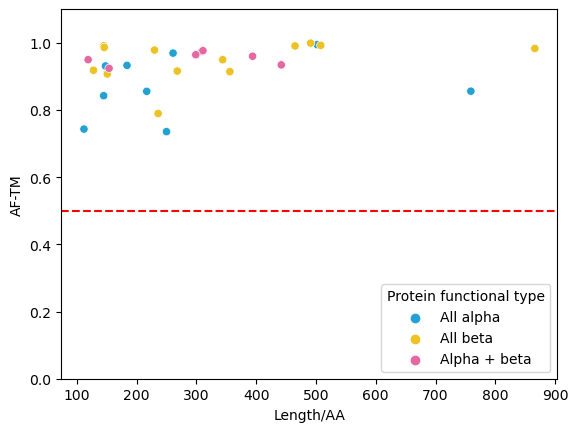

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y='AF-TM', hue='label', data=result, palette={'All alpha': '#24a1d3', 'All beta': '#ecc225', 'Alpha + beta': '#e469a2'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='lower right', title='Protein functional type')

# 计算'Length/AA'列的样本总量并输出结果
count = result['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

100.0
100.0
100.0


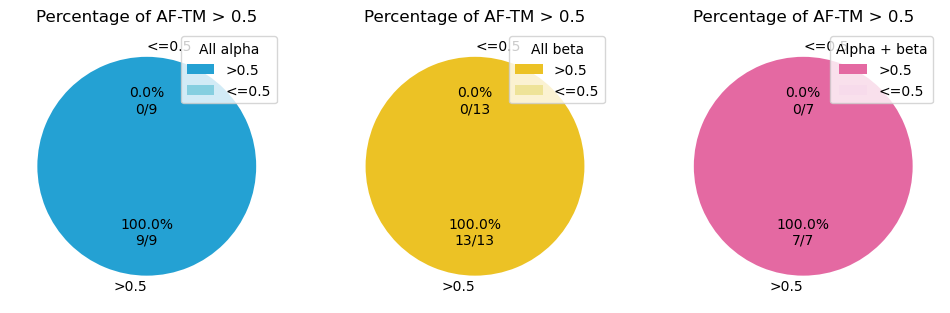

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"All alpha"标签的行
result_alpha_rows = result[result['label'] == 'All alpha']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
allalpha_total_tm = result_alpha_rows['AF-TM'].count()
allalpha_below6_tm = (result_alpha_rows['AF-TM'] > 0.5).sum()
allalpha_below6_percent = allalpha_below6_tm / allalpha_total_tm * 100
print(allalpha_below6_percent)

result_beta_rows = result[result['label'] == 'All beta']
allbeta_total_tm = result_beta_rows['AF-TM'].count()
allbeta_below6_tm = (result_beta_rows['AF-TM'] > 0.5).sum()
allbeta_below6_percent = allbeta_below6_tm / allbeta_total_tm * 100
print(allbeta_below6_percent)

result_alphabeta_rows = result[result['label'] == 'Alpha + beta']
alphabeta_total_tm = result_alphabeta_rows['AF-TM'].count()
alphabeta_below6_tm = (result_alphabeta_rows['AF-TM'] > 0.5).sum()
alphabeta_below6_percent = alphabeta_below6_tm / alphabeta_total_tm * 100
print(alphabeta_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [allalpha_below6_tm, allalpha_total_tm - allalpha_below6_tm]
data2 = [allbeta_below6_tm, allbeta_total_tm - allbeta_below6_tm]
data3 = [alphabeta_below6_tm, alphabeta_total_tm - alphabeta_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#24a1d3', '#86cfe0']
colors2 = ['#ecc225', '#eee398']
colors3 = ['#e469a2', '#f7dbeb']

# 创建包含 3 个子图的图形窗口
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

if allalpha_below6_percent >= 0:
    axs[0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, allalpha_total_tm), startangle=90)
    axs[0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0].legend(labels, title='All alpha', loc='best')
else: 
    axs[0].axis('off')

if allbeta_below6_percent >= 0:
    axs[1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, allbeta_total_tm), startangle=90)
    axs[1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1].legend(labels, title='All beta', loc='best')
else: 
    axs[1].axis('off')

if alphabeta_below6_percent >= 0:
    axs[2].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, alphabeta_total_tm), startangle=90)
    axs[2].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[2].legend(labels, title='Alpha + beta', loc='best')
else: 
    axs[2].axis('off')



# 显示饼图
plt.show()


#### 输出sm结果
> 改result & 改sm
- result9  |  1.0-0.9-TM
- result8  |  0.9-0.8-TM
- result7  |  0.8-0.7-TM
- result6  |  0.7-0.6-TM
- result5  |  0.6-0.5-TM
- result4  |  0.5-0.4-TM
- result3  |  0.4-0.3-TM

In [46]:
# result, SM = result9, '1.0-0.9-TM'
# result, SM = result8, '0.9-0.8-TM'
# result, SM = result7, '0.8-0.7-TM'
# result, SM = result6, '0.7-0.6-TM'
# result, SM = result5, '0.6-0.5-TM'
# result, SM = result4, '0.5-0.4-TM'
# result, SM = result3, '0.4-0.3-TM'

样本总量为:  29


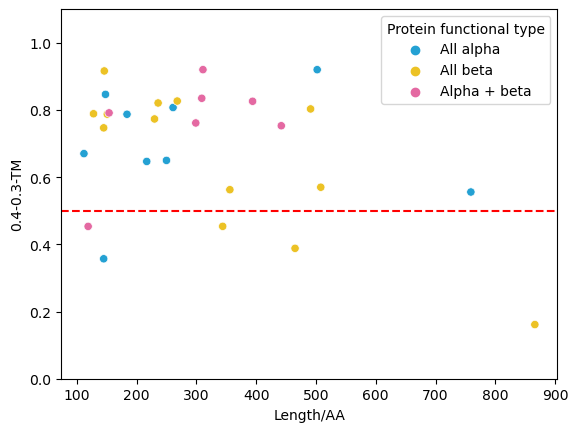

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y=SM, hue='label', data=result, palette={'All alpha': '#24a1d3', 'All beta': '#ecc225', 'Alpha + beta': '#e469a2'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='upper right', title='Protein functional type')

# 计算'Length/AA'列的样本总量并输出结果
count = result['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

88.88888888888889
76.92307692307693
85.71428571428571


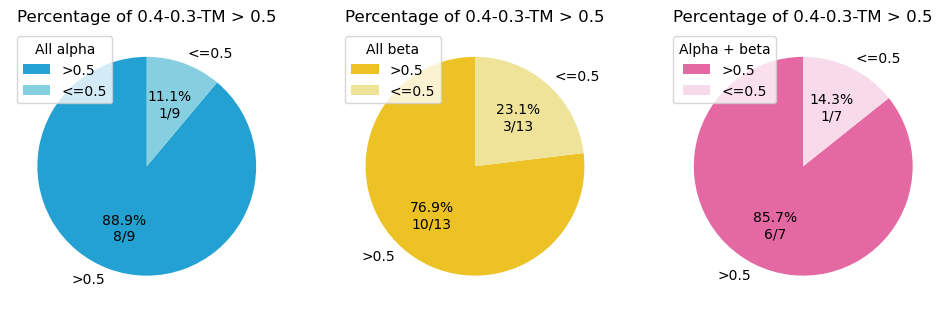

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"All alpha"标签的行
result_alpha_rows = result[result['label'] == 'All alpha']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
allalpha_total_tm = result_alpha_rows[SM].count()
allalpha_below6_tm = (result_alpha_rows[SM] > 0.5).sum()
allalpha_below6_percent = allalpha_below6_tm / allalpha_total_tm * 100
print(allalpha_below6_percent)

result_beta_rows = result[result['label'] == 'All beta']
allbeta_total_tm = result_beta_rows[SM].count()
allbeta_below6_tm = (result_beta_rows[SM] > 0.5).sum()
allbeta_below6_percent = allbeta_below6_tm / allbeta_total_tm * 100
print(allbeta_below6_percent)

result_alphabeta_rows = result[result['label'] == 'Alpha + beta']
alphabeta_total_tm = result_alphabeta_rows[SM].count()
alphabeta_below6_tm = (result_alphabeta_rows[SM] > 0.5).sum()
alphabeta_below6_percent = alphabeta_below6_tm / alphabeta_total_tm * 100
print(alphabeta_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [allalpha_below6_tm, allalpha_total_tm - allalpha_below6_tm]
data2 = [allbeta_below6_tm, allbeta_total_tm - allbeta_below6_tm]
data3 = [alphabeta_below6_tm, alphabeta_total_tm - alphabeta_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#24a1d3', '#86cfe0']
colors2 = ['#ecc225', '#eee398']
colors3 = ['#e469a2', '#f7dbeb']

# 创建包含 3 个子图的图形窗口
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

if allalpha_below6_percent >= 0:
    axs[0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, allalpha_total_tm), startangle=90)
    axs[0].set_title('Percentage of '+SM+' > 0.5', loc='center')
    axs[0].legend(labels, title='All alpha', loc='best')
else: 
    axs[0].axis('off')

if allbeta_below6_percent >= 0:
    axs[1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, allbeta_total_tm), startangle=90)
    axs[1].set_title('Percentage of '+SM+' > 0.5', loc='center')
    axs[1].legend(labels, title='All beta', loc='best')
else: 
    axs[1].axis('off')

if alphabeta_below6_percent >= 0:
    axs[2].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, alphabeta_total_tm), startangle=90)
    axs[2].set_title('Percentage of '+SM+' > 0.5', loc='center')
    axs[2].legend(labels, title='Alpha + beta', loc='best')
else: 
    axs[2].axis('off')



# 显示饼图
plt.show()
